# Rasterize Vectors w. Rasterio

----------------

```{admonition} Learning Objectives
* Convert vector data into raster format with rasterio
* Understand the requirements for successful conversion
```
```{admonition} Review
* [Geospatial Vector Data](c_vectors.md)
* [Geospatial Raster Data](c_rasters.md)
* [Reproject Rasters w. Rasterio and Geowombat](e_raster_reproject.md)
```

----------------

Rasterizing vectors can be helpful if you want to incorporate vector data (i.e., point, line, or polygon) in your raster analysis. The process is essentially what the name suggests: We take a vector and convert it into pixels. This can be done with `rasterio`.

## Setup

We'll begin by importing our modules (click the + below to show code cell).

In [1]:
# Import modules
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio import features
from rasterio.enums import MergeAlg
from rasterio.plot import show

## Rasterize vectors with rasterio

We'll read in the vector file (click the + below to show code cell). We will also read in a raster file to get the raster's metadata (e.g., coordinate system) so that we can apply those parameters to the vector file. In other words, the raster will serve as a "model" for the the rasterization of the vector. In particular, we are going to match the shape (number of rows and columns) and the transform. For a refresher on transforms, please see the chapter on [Affine Transforms](d_affine.md).

```{important} The vector and raster should be in the same coordinate system. If not, you'll need to re-project one of them so they are the same. To re-project vectors, see the chapter on [Understanding CRS Codes](d_understand_crs_codes.md). To re-project rasters, see the chapter on [Reproject Rasters w. Rasterio and Geowombat](e_raster_reproject.md).
```

In [2]:
# Read in vector
vector = gpd.read_file(r"../_static/e_vector_shapefiles/sf_bay_counties/sf_bay_counties.shp")

# Get list of geometries for all features in vector file
geom = [shapes for shapes in vector.geometry]

# Open example raster
raster = rasterio.open(r"../_static/e_raster/bay-area-wells_kde_sklearn.tif")

With our data loaded, we can rasterize the vector using the metadata from the raster using `rasterize()` in the `rasterio.features` module. For more information on this function, check out [the `rasterio` documentation](https://rasterio.readthedocs.io/en/latest/api/rasterio.features.html#rasterio.features.rasterize).

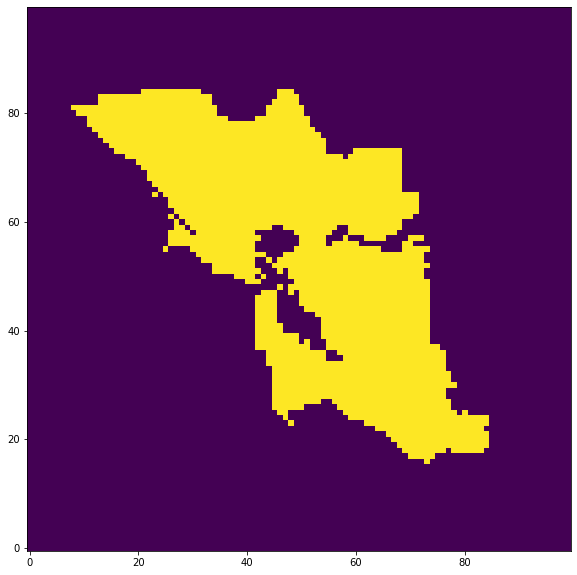

In [3]:
# Rasterize vector using the shape and coordinate system of the raster
rasterized = features.rasterize(geom,
                                out_shape = raster.shape,
                                fill = 0,
                                out = None,
                                transform = raster.transform,
                                all_touched = False,
                                merge_alg = MergeAlg.replace,
                                default_value = 1,
                                dtype = None)

# Plot raster
fig, ax = plt.subplots(1, figsize = (10, 10))
show(rasterized, ax = ax)
plt.gca().invert_yaxis()

Finally, we can save the rasterized vector out (click the + below to show code cell).

In [4]:
with rasterio.open(
        "../temp/rasterized_vector.tif", "w",
        driver = "GTiff",
        transform = raster.transform,
        dtype = rasterio.uint8,
        count = 1,
        width = raster.width,
        height = raster.height) as dst:
    dst.write(rasterized, indexes = 1)